In [2]:
# import data
import pandas as pd
df=pd.read_csv('mldata.csv')
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [3]:
df['gender']=df['gender'].replace('Male',1)
df['gender']=df['gender'].replace('Female',0)


In [4]:
df.tail()

,age,height,weight,gender,likeness
240,31,160.0,60.0,1,Pakora
241,26,172.0,70.0,1,Biryani
242,40,178.0,80.0,1,Biryani
243,25,5.7,65.0,1,Biryani
244,33,157.0,56.0,0,Samosa


In [5]:
# selection of input and target
X=df[['age','height','weight','gender']]
y=df['likeness']
X.head()

,age,height,weight,gender
0,27,170.688,76.0,1
1,41,165.000,70.0,1
2,29,171.000,80.0,1
3,27,173.000,102.0,1
4,29,164.000,67.0,1


In [6]:
y.head()

0    Biryani
1    Biryani
2    Biryani
3    Biryani
4    Biryani
Name: likeness, dtype: object

In [12]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\dania\appdata\local\programs\python\python39\lib\site-packages (1.1.1)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\dania\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
from sklearn.tree import DecisionTreeClassifier
# create and fit model
model=DecisionTreeClassifier().fit(X,y)
# prediction
model.predict([[32,56,60,1]])

c:\Users\dania\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Pakora'], dtype=object)

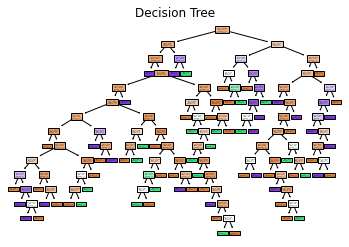

0.40816326530612246

In [9]:
from sklearn.tree import DecisionTreeClassifier
# HOw to measure accuracy of our model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)
# create and fit model
model=DecisionTreeClassifier().fit(X_train,y_train)
plot_tree(model,filled=True)
plt.title("Decision Tree")
plt.show()
# prediction
predicted_values=model.predict(X_test)
predicted_values
# Accuracy
actual_values=y_test
score=accuracy_score(actual_values,predicted_values)
score

## Train and save your model


In [35]:
pip install joblib


You should consider upgrading via the 'c:\Users\dania\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [46]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier().fit(X,y)
joblib.dump(model,"foodie.joblib")

['foodie.joblib']

In [48]:
# load the model from disk
loaded_model = joblib.load('foodie.joblib')
result = loaded_model.score(X_test, y_test)
print(result)

1.0


In [50]:
# graph
from sklearn import tree
model=DecisionTreeClassifier().fit(X,y)
#graphic evaluation
tree.export_graphviz(model,
out_file="foodie.dot",
feature_names=['age','height','weight','gender'],
class_names=sorted(y.unique()),
label='all',
rounded=True,
filled=True)